# Running the optimizer with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import Himmelblau

himmelblau = Himmelblau()

In [2]:
boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=himmelblau.dofs, 
                                             dets=[],
                                             bounds=himmelblau.bounds, 
                                             db=db, 
                                             experiment=himmelblau,
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


Transient Scan ID: 1     Time: 2023-04-25 16:01:29
Persistent Unique Scan ID: 'a030b5bf-520b-4024-85fa-59d12f09d922'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:29.4 |     -0.482 |      0.493 |
|         2 | 16:01:29.4 |     -4.232 |      2.715 |
|         3 | 16:01:29.4 |     -2.982 |     -1.729 |
|         4 | 16:01:29.4 |     -1.732 |     -3.952 |
|         5 | 16:01:29.4 |      0.768 |     -2.841 |
|         6 | 16:01:29.4 |      3.268 |     -0.618 |
|         7 | 16:01:29.4 |      2.018 |      1.604 |


|         8 | 16:01:29.4 |      4.518 |      3.826 |
+-----------+------------+------------+------------+
generator list_scan ['a030b5bf'] (scan num: 1)





         x1        x2     fitness
0 -0.481887  0.492783 -157.979533
1 -4.231887  2.715005 -107.523373
2 -2.981887 -1.729439  -63.601700
3 -1.731887 -3.951661 -190.241671
4  0.768113 -2.840550 -178.951110
5  3.268113 -0.618328  -12.098935
6  2.018113  1.603894  -34.143041
7  4.518113  3.826116 -323.082876


('a030b5bf-520b-4024-85fa-59d12f09d922',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer:

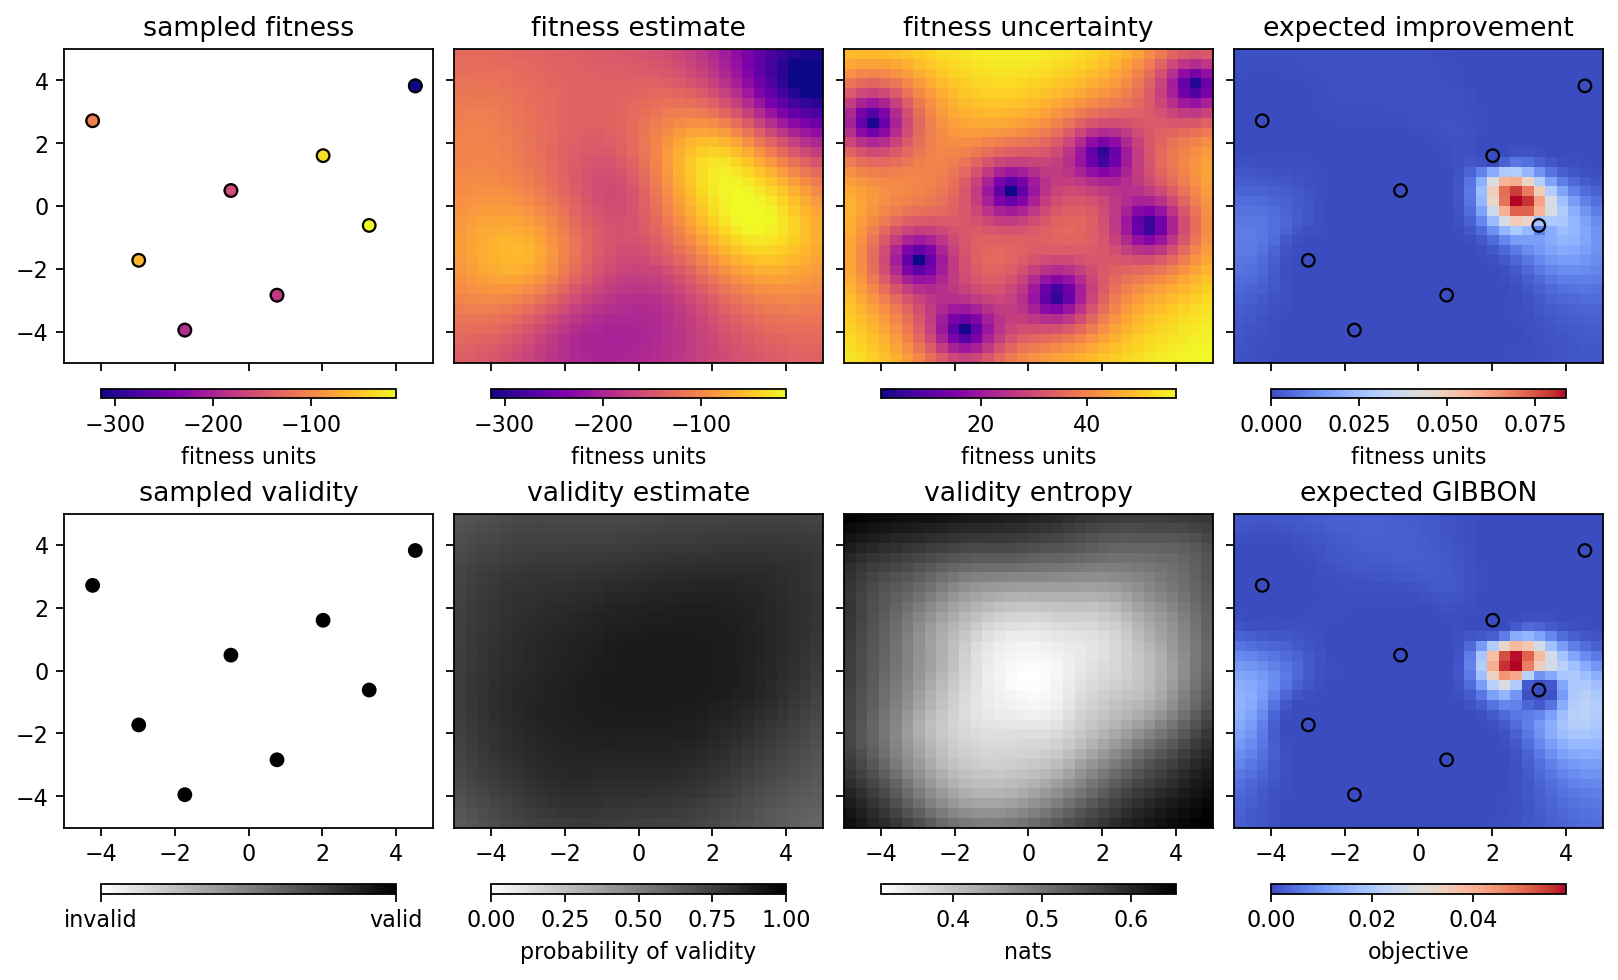

In [3]:
boa.plot_state(gridded=True)

Now let's try the "EI" strategy to sample where we expect the largest improvement in the fitness:

learning with strategy "eI" ...




Transient Scan ID: 2     Time: 2023-04-25 16:01:36
Persistent Unique Scan ID: 'da89955e-c477-421a-8216-d5b0eeec4cc6'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:36.3 |      2.525 |      0.321 |
|         2 | 16:01:36.3 |      3.366 |     -0.290 |
|         3 | 16:01:36.3 |      4.726 |     -1.926 |
|         4 | 16:01:36.3 |     -4.869 |     -1.467 |
+-----------+------------+------------+------------+
generator list_scan ['da89955e'] (scan num: 2)





          x1        x2     fitness
8   2.525053  0.320529  -37.637001
9   3.366179 -0.290299  -12.600956
10  4.725844 -1.926476  -90.559484
11 -4.869003 -1.466569 -220.794547


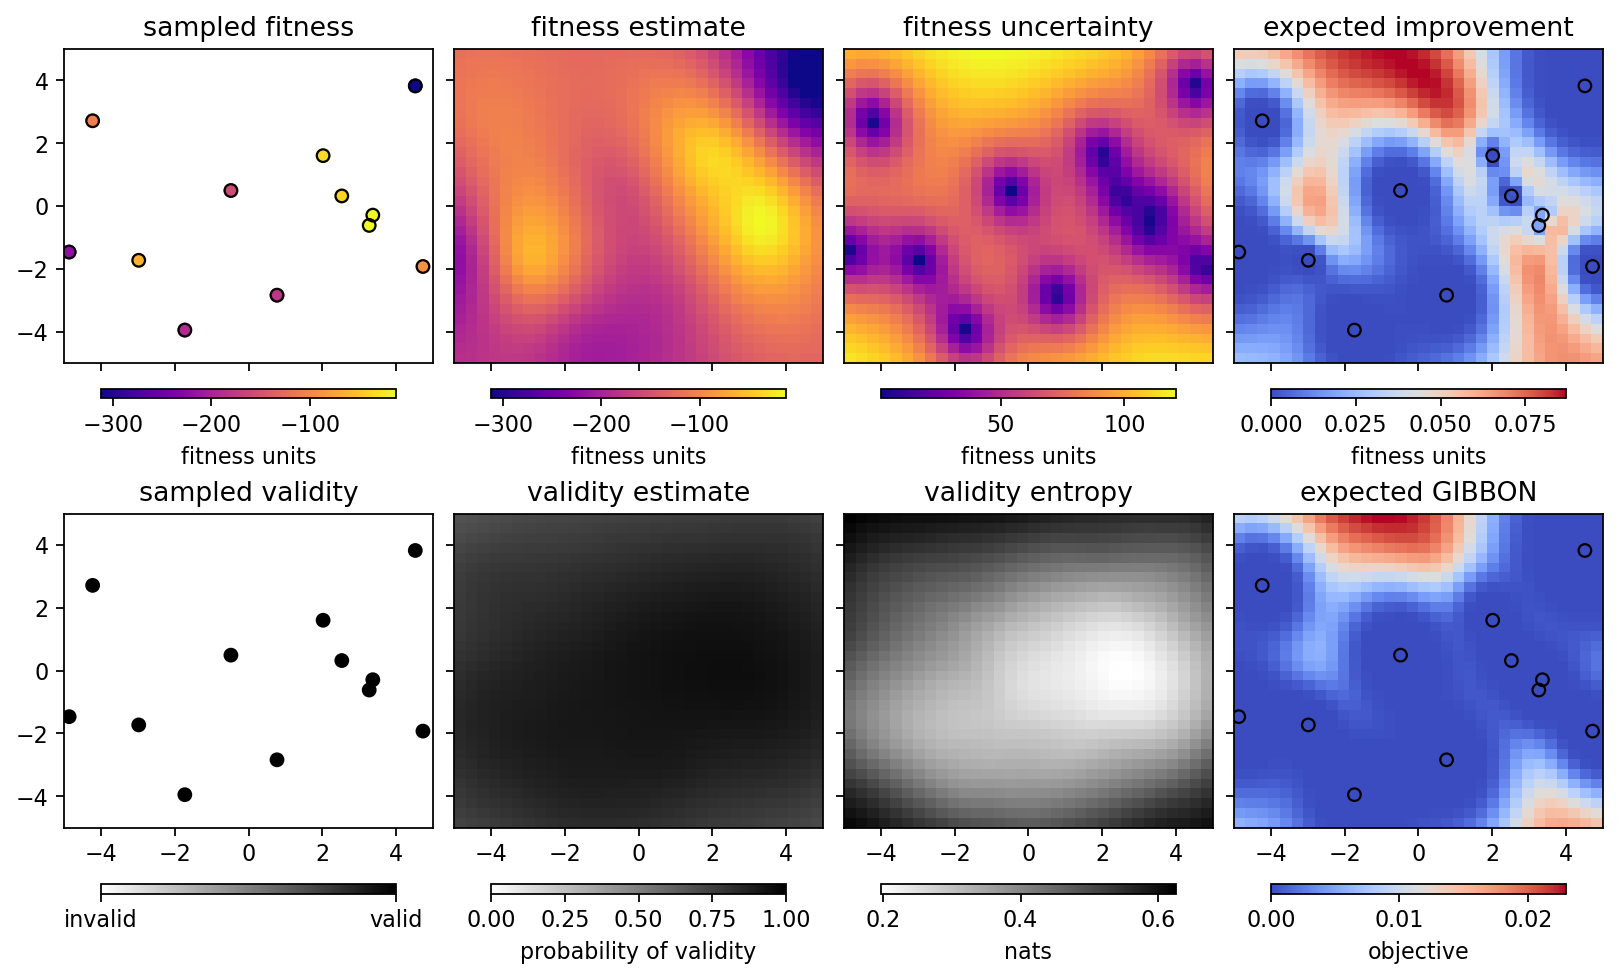

In [4]:
RE(boa.learn(strategy='eI', n_iter=1, n_per_iter=4))
boa.plot_state(gridded=True)

Let's learn a bit more, using the "GIBBON" framework to investigate points that are likely to tell us about the optimum. Running two iterations with four points per iteration:

learning with strategy "eGIBBON" ...




Transient Scan ID: 3     Time: 2023-04-25 16:01:43
Persistent Unique Scan ID: '0d76b69b-40ac-46d1-ba12-e9d1662f61c6'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:43.4 |     -4.648 |      4.754 |
|         2 | 16:01:43.4 |     -0.755 |      4.891 |
|         3 | 16:01:43.4 |      4.970 |      0.087 |
|         4 | 16:01:43.4 |      4.886 |     -4.964 |
+-----------+------------+------------+------------+
generator list_scan ['0d76b69b'] (scan num: 3)





          x1        x2     fitness
12 -4.647937  4.753567 -355.702879
13 -0.755147  4.890546 -291.902538
14  4.970446  0.086775 -194.310834
15  4.886459 -4.964248 -570.230032




Transient Scan ID: 4     Time: 2023-04-25 16:01:46
Persistent Unique Scan ID: '640fa1d5-0ab0-43f9-a5ac-1ee09630136e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:46.8 |      2.039 |     -0.893 |
|         2 | 16:01:46.8 |     -3.343 |      0.520 |
|         3 | 16:01:46.8 |     -1.214 |     -1.770 |
|         4 | 16:01:46.8 |     -4.813 |     -4.909 |
+-----------+------------+------------+------------+
generator list_scan ['640fa1d5'] (scan num: 4)





          x1        x2     fitness
16  2.038793 -0.892907  -77.187514
17 -3.342925  0.520329 -101.932555
18 -1.213923 -1.770207 -153.422484
19 -4.813038 -4.909343 -203.659427




Transient Scan ID: 5     Time: 2023-04-25 16:01:50
Persistent Unique Scan ID: '0968f413-75fa-4d96-9276-547df9530bba'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:50.2 |      3.591 |     -1.196 |
|         2 | 16:01:50.2 |      2.983 |      1.282 |
|         3 | 16:01:50.2 |      1.382 |      0.776 |
|         4 | 16:01:50.2 |      0.520 |      2.394 |
+-----------+------------+------------+------------+
generator list_scan ['0968f413'] (scan num: 5)





          x1        x2    fitness
20  3.591270 -1.196380  -4.401311
21  2.983402  1.281766  -6.302711
22  1.381510  0.775601 -94.322641
23  0.520125  2.393734 -70.046872




Transient Scan ID: 6     Time: 2023-04-25 16:01:53
Persistent Unique Scan ID: '3bf5e51a-e447-4cc1-b846-a7c96b7040f3'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:01:53.8 |     -2.308 |      2.055 |
|         2 | 16:01:53.8 |      2.739 |      2.113 |
|         3 | 16:01:53.8 |      3.136 |      0.792 |
|         4 | 16:01:53.8 |      3.004 |     -1.663 |
+-----------+------------+------------+------------+
generator list_scan ['3bf5e51a'] (scan num: 6)





          x1        x2    fitness
24 -2.307779  2.054683 -38.968567
25  2.739175  2.112939  -1.956896
26  3.135883  0.791822 -10.619239
27  3.003539 -1.662816 -14.777621


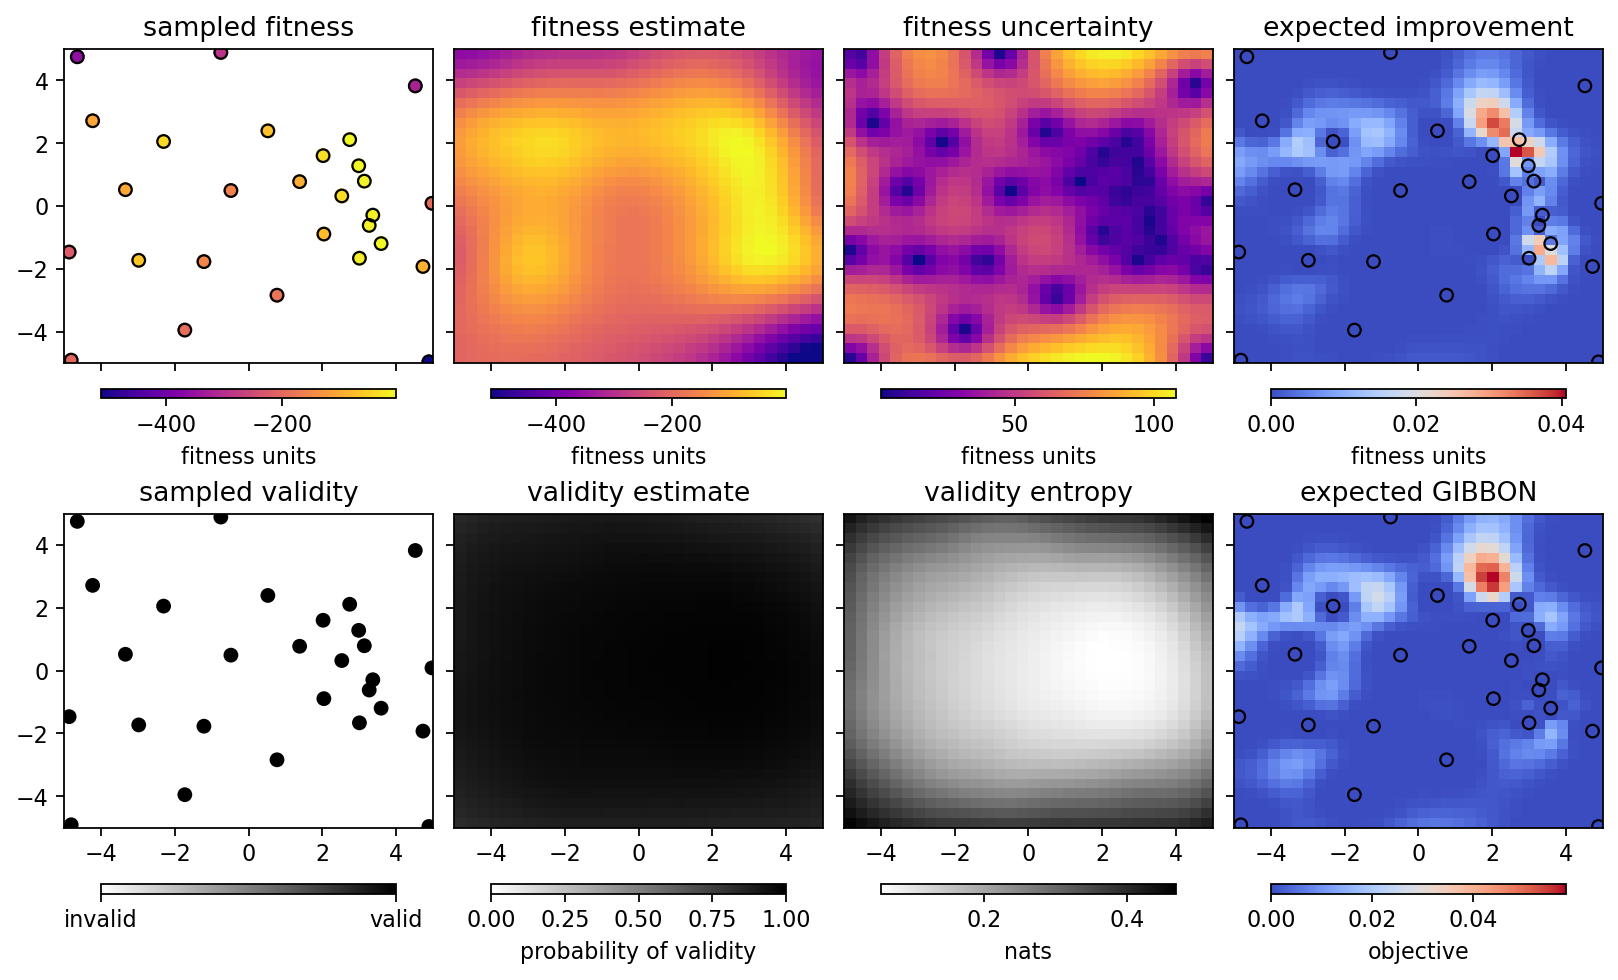

In [5]:
RE(boa.learn(strategy='eGIBBON', n_iter=4, n_per_iter=4))
boa.plot_state(gridded=True)

Eventually, we reach a point of saturation where no more improvement takes place:

learning with strategy "eGIBBON" ...




Transient Scan ID: 7     Time: 2023-04-25 16:02:00
Persistent Unique Scan ID: '6f3810ae-f683-4bfa-861f-5f662302be7a'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:00.9 |      1.943 |      3.049 |
|         2 | 16:02:00.9 |     -0.958 |      2.255 |
|         3 | 16:02:00.9 |     -2.816 |      2.912 |
|         4 | 16:02:00.9 |     -4.958 |      1.500 |
+-----------+------------+------------+------------+
generator list_scan ['6f3810ae'] (scan num: 7)





          x1        x2     fitness
28  1.942943  3.048822  -35.403094
29 -0.957795  2.254980  -69.525425
30 -2.816368  2.912468   -1.803496
31 -4.958420  1.499766 -321.845397




Transient Scan ID: 8     Time: 2023-04-25 16:02:04
Persistent Unique Scan ID: '57a887db-b2f6-436f-8d64-90dd607cdf85'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:04.7 |     -3.180 |      2.244 |
|         2 | 16:02:04.7 |     -2.325 |      2.934 |
|         3 | 16:02:04.7 |      2.356 |      2.391 |
|         4 | 16:02:04.7 |     -2.387 |     -0.199 |
+-----------+------------+------------+------------+
generator list_scan ['57a887db'] (scan num: 8)





          x1        x2     fitness
32 -3.179802  2.244063  -28.297151
33 -2.324732  2.933767   -7.600621
34  2.355785  2.391456  -10.511674
35 -2.386921 -0.198974 -117.640004




Transient Scan ID: 9     Time: 2023-04-25 16:02:08
Persistent Unique Scan ID: 'da90f311-de28-4b46-bc63-e4c34c8d692d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:08.5 |     -2.810 |      2.651 |
|         2 | 16:02:08.5 |      1.945 |      4.952 |
|         3 | 16:02:08.5 |      2.633 |      1.850 |
|         4 | 16:02:08.5 |      3.718 |     -1.674 |
+-----------+------------+------------+------------+
generator list_scan ['da90f311'] (scan num: 9)





          x1        x2     fitness
36 -2.809596  2.650948   -7.947149
37  1.944916  4.951752 -384.009908
38  2.633260  1.849620   -5.806334
39  3.718188 -1.674266   -1.553105




Transient Scan ID: 10     Time: 2023-04-25 16:02:12
Persistent Unique Scan ID: '80849435-7c44-4914-832e-c5eb517d0410'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:12.1 |      3.404 |     -1.473 |
|         2 | 16:02:12.1 |      3.199 |      1.787 |
|         3 | 16:02:12.1 |      1.587 |      2.459 |
|         4 | 16:02:12.1 |      0.248 |     -4.970 |
+-----------+------------+------------+------------+
generator list_scan ['80849435'] (scan num: 10)





          x1        x2     fitness
40  3.404005 -1.472767   -2.820331
41  3.198634  1.786967   -1.406591
42  1.586840  2.458623  -36.679344
43  0.248323 -4.969738 -575.148074




Transient Scan ID: 11     Time: 2023-04-25 16:02:15
Persistent Unique Scan ID: 'e0fdc403-794f-4ced-92b0-855eb05b4b77'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:15.8 |     -3.155 |     -3.118 |
|         2 | 16:02:15.8 |     -2.661 |      4.365 |
|         3 | 16:02:15.8 |      2.986 |      2.064 |
|         4 | 16:02:15.8 |      3.491 |      1.157 |
+-----------+------------+------------+------------+
generator list_scan ['e0fdc403'] (scan num: 11)





          x1        x2    fitness
44 -3.154932 -3.118458 -17.531108
45 -2.660774  4.364706 -88.367450
46  2.986459  2.064181  -0.061444
47  3.490534  1.157278 -10.190418




Transient Scan ID: 12     Time: 2023-04-25 16:02:19
Persistent Unique Scan ID: 'ac8ee2fb-4784-421b-afb7-2b935ed45cd4'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:19.5 |      3.159 |     -2.496 |
|         2 | 16:02:19.5 |     -2.569 |     -2.716 |
|         3 | 16:02:19.5 |     -3.792 |     -2.867 |
|         4 | 16:02:19.5 |     -3.062 |     -4.437 |
+-----------+------------+------------+------------+
generator list_scan ['ac8ee2fb'] (scan num: 12)





          x1        x2     fitness
48  3.159440 -2.495663  -18.046848
49 -2.569193 -2.715814  -55.435718
50 -3.791883 -2.867086   -6.875076
51 -3.061526 -4.436643 -129.356646




Transient Scan ID: 13     Time: 2023-04-25 16:02:23
Persistent Unique Scan ID: 'a1aa91b2-170e-40fd-9f8f-32318d6f4c67'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:23.3 |     -3.800 |     -3.336 |
|         2 | 16:02:23.3 |     -3.495 |     -2.547 |
|         3 | 16:02:23.4 |     -2.618 |      3.432 |
|         4 | 16:02:23.4 |      3.346 |     -1.909 |
+-----------+------------+------------+------------+
generator list_scan ['a1aa91b2'] (scan num: 13)





          x1        x2    fitness
52 -3.800245 -3.336086  -0.119579
53 -3.494575 -2.547089 -17.837658
54 -2.618078  3.431758  -5.170439
55  3.346386 -1.908700  -2.925583




Transient Scan ID: 14     Time: 2023-04-25 16:02:27
Persistent Unique Scan ID: '18a3757e-0f9d-47b6-9d5c-79b4f0452c24'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:02:27.2 |      2.326 |     -2.238 |
|         2 | 16:02:27.2 |      4.968 |      1.822 |
|         3 | 16:02:27.2 |     -3.085 |      3.382 |
|         4 | 16:02:27.2 |     -4.265 |     -3.265 |
+-----------+------------+------------+------------+
generator list_scan ['18a3757e'] (scan num: 14)





          x1        x2     fitness
56  2.325913 -2.237700  -61.385976
57  4.968004  1.821633 -241.988203
58 -3.084515  3.381589   -5.418335
59 -4.264983 -3.264530  -15.779373


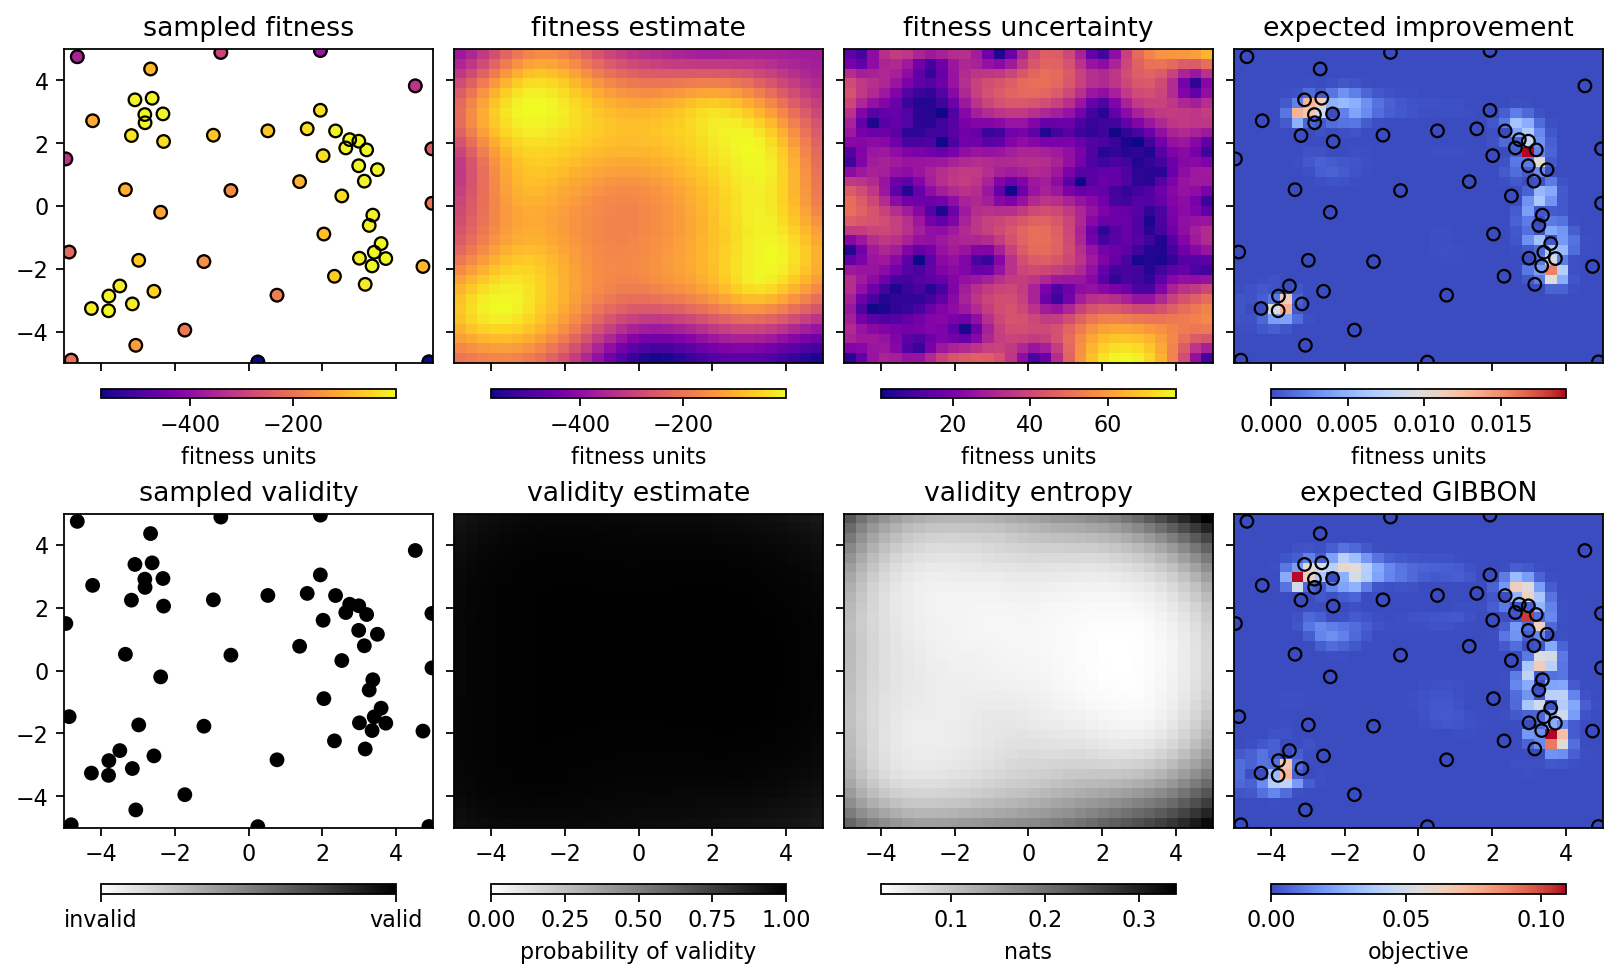

In [6]:
RE(boa.learn(strategy='eGIBBON', n_iter=8, n_per_iter=4))
boa.plot_state(gridded=True)